In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from bs4 import BeautifulSoup
import seaborn as sns
import re

%matplotlib notebook

In [153]:
# gets gdp data for country specified
def get_gdp_data(country):
    url = 'https://www.macrotrends.net/countries/' + country + '/gdp-per-capita'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    tables = soup.findChildren('table') # gets all tables
    my_table = tables[1] # table with US gdp per capita data
    rows = my_table.findChildren(['tr']) # separates each row of data

    year = pd.Series(map(lambda x: x.findChildren('td')[0].text,rows[2:]))
    gdp2 = pd.Series(map(lambda x: x.findChildren('td')[1].text,rows[2:]))
    annual_growth_rate = pd.Series(map(lambda x: x.findChildren('td')[2].text,rows[2:]))

    df2 = pd.DataFrame([])
    df2['Year'] = year.astype(str)
    df2['GDP string'] = gdp2
    df2['Annual Growth Rate'] = annual_growth_rate
    country_name = country.split('/')[1].replace('-', ' ')
    df2['Country'] = [country_name for i in range(0,len(df2))]
    
    # final cleaning
    df2['GDP string'] = df2['GDP string'].apply(lambda x: x.replace('(Measured)', '')).apply(lambda x: x.replace('(Forecasted)', ''))
    df2['GDP per capita'] = df2['GDP string'].apply(lambda x: x.replace(r'$', '')).apply(lambda x: x.replace(r',', '')).astype(float)
    return df2


In [154]:
# Data for top ten most populated countries
countries = ['CHN/china', 'IND/India', 'USA/united-states', 'IDN/indonesia', 'PAK/pakistan', 
             'NGA/nigeria', 'BRA/brazil', 'BGD/bangladesh', 'RUS/russia', 'MEX/mexico']

# Contains list of dataframes with each dataframe containing country data
data = pd.concat(list(map(get_gdp_data, countries)))


In [155]:
# Get Population for top ten countries
url = 'https://www.census.gov/popclock/print.php?component=counter'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
_ = re.findall(r'rows":\{(.*?)\}', soup.text)[0].split(',')

# filter out country names and populations
country_names = list(map(lambda x: x.split(':')[0].replace('"', '').lower(), _ ))
populations = list(map(lambda x: float(x.split(':')[1]), _ ))
# create a dataframe for this new data
pop_df = pd.DataFrame([])
pop_df['Country'] = country_names
pop_df['Population'] = populations

# merge data with pop_df
data = pd.merge(data, pop_df, how='inner', left_on='Country', right_on='Country')
#data = data.drop(['Population_x', 'Population_y'], axis=1)

# more cleaning
data['Annual Growth Rate'] = data['Annual Growth Rate'].apply(lambda x: float(x.replace('%', '')))
data['Total GDP'] = data['Population'] * data['GDP per capita']
data['Year'] = data['Year'].astype(int)

data


,Year,GDP string,Annual Growth Rate,Country,GDP per capita,Population,Total GDP
0,2019,"$10,262",2.86,china,10262.0,1.394016e+09,1.430539e+13
1,2018,"$9,977",12.36,china,9977.0,1.394016e+09,1.390810e+13
2,2017,"$8,879",8.98,china,8879.0,1.394016e+09,1.237747e+13
3,2016,"$8,148",1.00,china,8148.0,1.394016e+09,1.135844e+13
4,2015,"$8,067",5.06,china,8067.0,1.394016e+09,1.124553e+13
5,2014,"$7,679",8.91,china,7679.0,1.394016e+09,1.070465e+13
6,2013,"$7,051",11.62,china,7051.0,1.394016e+09,9.829207e+12
7,2012,"$6,317",12.44,china,6317.0,1.394016e+09,8.805999e+12
8,2011,"$5,618",23.46,china,5618.0,1.394016e+09,7.831582e+12
9,2010,"$4,550",18.74,china,4550.0,1.394016e+09,6.342773e+12


<IPython.core.display.Javascript object>


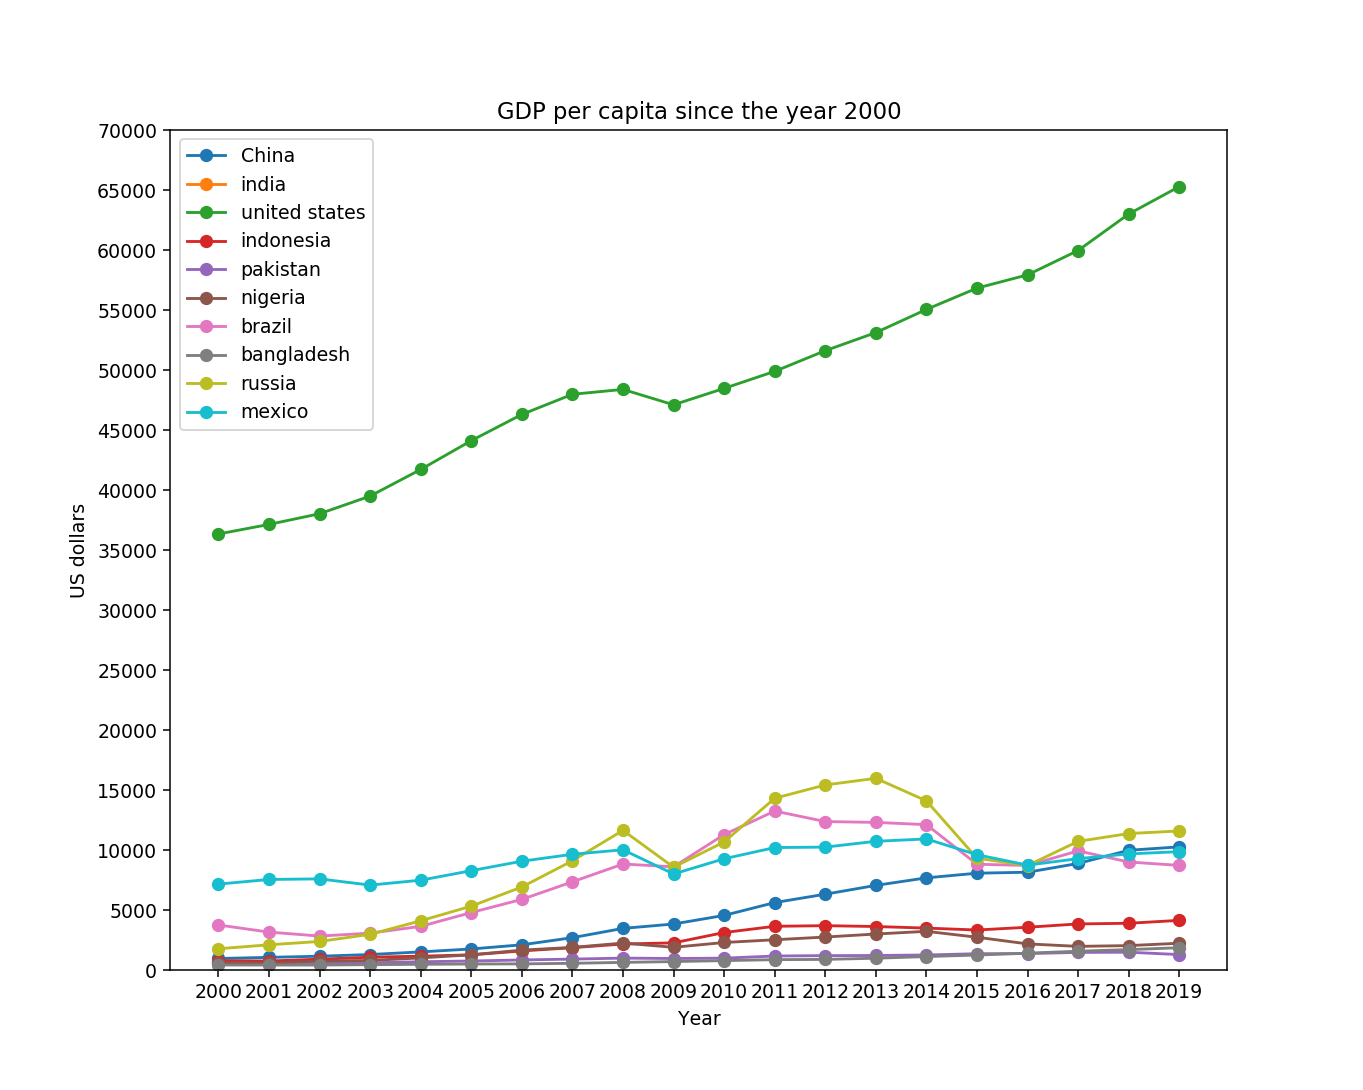

Text(0.5,0,'Year')

In [169]:
# look at every year since 2000
since2k = data[data['Year'] >= 2000].sort_values(by='Year', ascending=True)

# make figure and set x and y tick values
plt.figure(figsize=(10,8))
plt.xticks([i for i in range(0,len(since2k[since2k['Country'] == 'china']))], since2k[since2k['Country'] == 'china']['Year'].astype(str).tolist())
plt.yticks([0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000])

# Change y-max limit to see lines in more detail
plt.gca().set_ylim([0,70000])

# FIXME: plot data
# def plot_gdp(country):
#     country_name = country.split('/')[1].replace('-', ' ')
#     plt.plot(since2k[since2k['Country'] == country_name]['GDP per capita'].tolist(), '-o', label=country_name.capitalize())
#     plt.show()
# map(plot_gdp, countries)

# Manual Plot
plt.plot(since2k[since2k['Country'] == 'china']['GDP per capita'].tolist(), '-o', label='China')
plt.plot(since2k[since2k['Country'] == 'india']['GDP per capita'].tolist(), '-o', label='india')
plt.plot(since2k[since2k['Country'] == 'united states']['GDP per capita'].tolist(), '-o', label='united states')
plt.plot(since2k[since2k['Country'] == 'indonesia']['GDP per capita'].tolist(), '-o', label='indonesia')
plt.plot(since2k[since2k['Country'] == 'pakistan']['GDP per capita'].tolist(), '-o', label='pakistan')
plt.plot(since2k[since2k['Country'] == 'nigeria']['GDP per capita'].tolist(), '-o', label='nigeria')
plt.plot(since2k[since2k['Country'] == 'brazil']['GDP per capita'].tolist(), '-o', label='brazil')
plt.plot(since2k[since2k['Country'] == 'bangladesh']['GDP per capita'].tolist(), '-o', label='bangladesh')
plt.plot(since2k[since2k['Country'] == 'russia']['GDP per capita'].tolist(), '-o', label='russia')
plt.plot(since2k[since2k['Country'] == 'mexico']['GDP per capita'].tolist(), '-o', label='mexico')

# # create legend and title
plt.legend()
plt.gca().set_title('GDP per capita since the year 2000')
plt.gca().set_ylabel('US dollars')
plt.gca().set_xlabel('Year')
